# 1. Preparation of Data

# Import all of libraries that is required

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from math import log
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline

# Read in the Regresi pariwisata di Provinsi Bali csv file as DataFrame called bali_tourism

In [ ]:
bali_tourism  =pd.read_csv("/content/Regresi pariwisata di Provinsi Bali.csv")

# Check the head of bali_tourism

In [ ]:
bali_tourism.head()

,District,Star_Beds,Non_Star_Beds,Travel_Bureau,Seats,Restaurant,Non_Star_Rooms,Star_Rooms,Local_Revenue
0,Kab. Jembrana,224,1172,0,88,136,919,158,175992613
1,Kab. Tabanan,941,1777,0,2435,92,1584,903,436408393
2,Kab. Badung,60006,20126,155,46103,823,14490,43163,3705745447
3,Kab. Gianyar,2418,8973,8,17919,952,7282,1860,857553633
4,Kab. Klungkung,484,2834,0,4024,245,2477,333,309462458


# Check the bali_torism table's shape

In [ ]:
bali_tourism.shape

(108, 9)

# Check the bali_tourism info

In [ ]:
bali_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   District        108 non-null    object
 1   Star_Beds       108 non-null    object
 2   Non_Star_Beds   108 non-null    int64 
 3   Travel_Bureau   108 non-null    int64 
 4   Seats           108 non-null    object
 5   Restaurant      108 non-null    int64 
 6   Non_Star_Rooms  108 non-null    object
 7   Star_Rooms      108 non-null    object
 8   Local_Revenue   108 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 7.7+ KB


# Replace "0" value in "-" value in order to eliminate error tthat will occured

In [ ]:
bali_tourism.replace('-',0,inplace=True)

In [ ]:
bali_tourism['Star_Beds'] = bali_tourism['Star_Beds'].astype('int64')
bali_tourism['Seats'] = bali_tourism['Seats'].astype('int64')
bali_tourism['Non_Star_Rooms'] = bali_tourism['Non_Star_Rooms'].astype('int64')
bali_tourism['Star_Rooms'] = bali_tourism['Star_Rooms'].astype('int64')

# Recheck the bali_torism info

In [ ]:
bali_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   District        108 non-null    object
 1   Star_Beds       108 non-null    int64 
 2   Non_Star_Beds   108 non-null    int64 
 3   Travel_Bureau   108 non-null    int64 
 4   Seats           108 non-null    int64 
 5   Restaurant      108 non-null    int64 
 6   Non_Star_Rooms  108 non-null    int64 
 7   Star_Rooms      108 non-null    int64 
 8   Local_Revenue   108 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 7.7+ KB


# Drop "District" column that it is useless for regression calculation  

In [ ]:
bali_tourism.drop(['District'],axis=1,inplace=True)

# Check the bali_tourism describe methods

In [ ]:
bali_tourism.describe()

,Star_Beds,Non_Star_Beds,Travel_Bureau,Seats,Restaurant,Non_Star_Rooms,Star_Rooms,Local_Revenue
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02
mean,5936.907407,6697.324074,40.148148,10548.472222,248.509259,4020.203704,4039.500000,6.061025e+08
std,15573.052647,9415.287025,78.555036,15272.510552,279.235555,6017.262295,10797.924392,9.571299e+08
min,0.000000,251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.296124e+07
25%,106.250000,1267.250000,0.750000,1136.250000,40.000000,788.000000,87.000000,1.326631e+08
50%,449.500000,3624.500000,1.000000,3610.000000,135.000000,2124.000000,331.000000,2.583202e+08
75%,1505.250000,8612.500000,19.250000,16394.500000,440.750000,3806.750000,1118.500000,5.338659e+08
max,83231.000000,45482.000000,275.000000,60499.000000,1053.000000,32127.000000,58694.000000,4.835188e+09


# Check null value im bali_tourism

In [ ]:
print(bali_tourism.isnull().sum())

Star_Beds         0
Non_Star_Beds     0
Travel_Bureau     0
Seats             0
Restaurant        0
Non_Star_Rooms    0
Star_Rooms        0
Local_Revenue     0
dtype: int64


# Check possibility duplicated value im bali_tourism

In [ ]:
bali_tourism.duplicated().sum()

0

# 2. Exploratory Data Analysis

# Use heatmap to recreate the plot below

,Star_Beds,Non_Star_Beds,Travel_Bureau,Seats,Restaurant,Non_Star_Rooms,Star_Rooms,Local_Revenue
Star_Beds,1.000000,0.815314,0.434853,0.747450,0.576387,0.873981,0.996100,0.897367
Non_Star_Beds,0.815314,1.000000,0.493934,0.841404,0.738196,0.801033,0.804142,0.913383
Travel_Bureau,0.434853,0.493934,1.000000,0.700761,0.551864,0.435861,0.416173,0.534599
Seats,0.747450,0.841404,0.700761,1.000000,0.867118,0.695640,0.736820,0.820901
Restaurant,0.576387,0.738196,0.551864,0.867118,1.000000,0.685323,0.567163,0.689493
Non_Star_Rooms,0.873981,0.801033,0.435861,0.695640,0.685323,1.000000,0.850531,0.803933
Star_Rooms,0.996100,0.804142,0.416173,0.736820,0.567163,0.850531,1.000000,0.894858
Local_Revenue,0.897367,0.913383,0.534599,0.820901,0.689493,0.803933,0.894858,1.000000


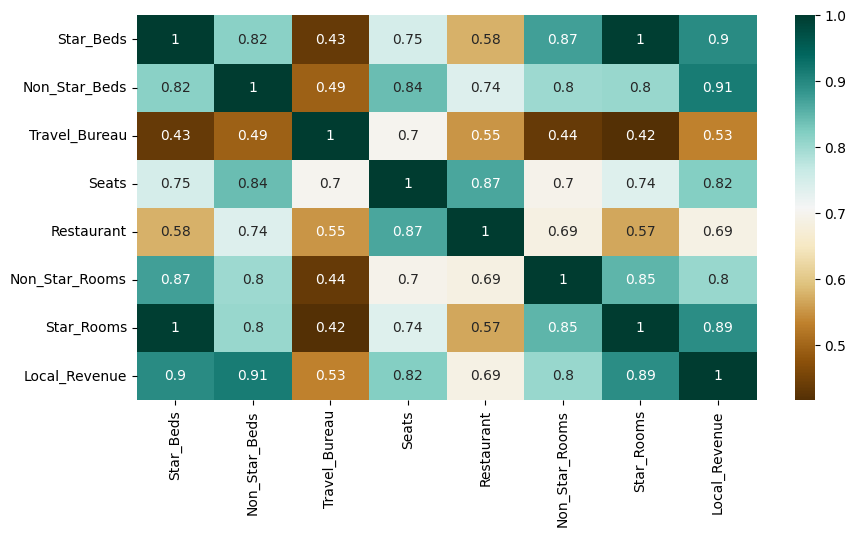

In [ ]:
plt.figure(figsize=(10,5))
c = bali_tourism.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Use pairplot to recreate the plot below

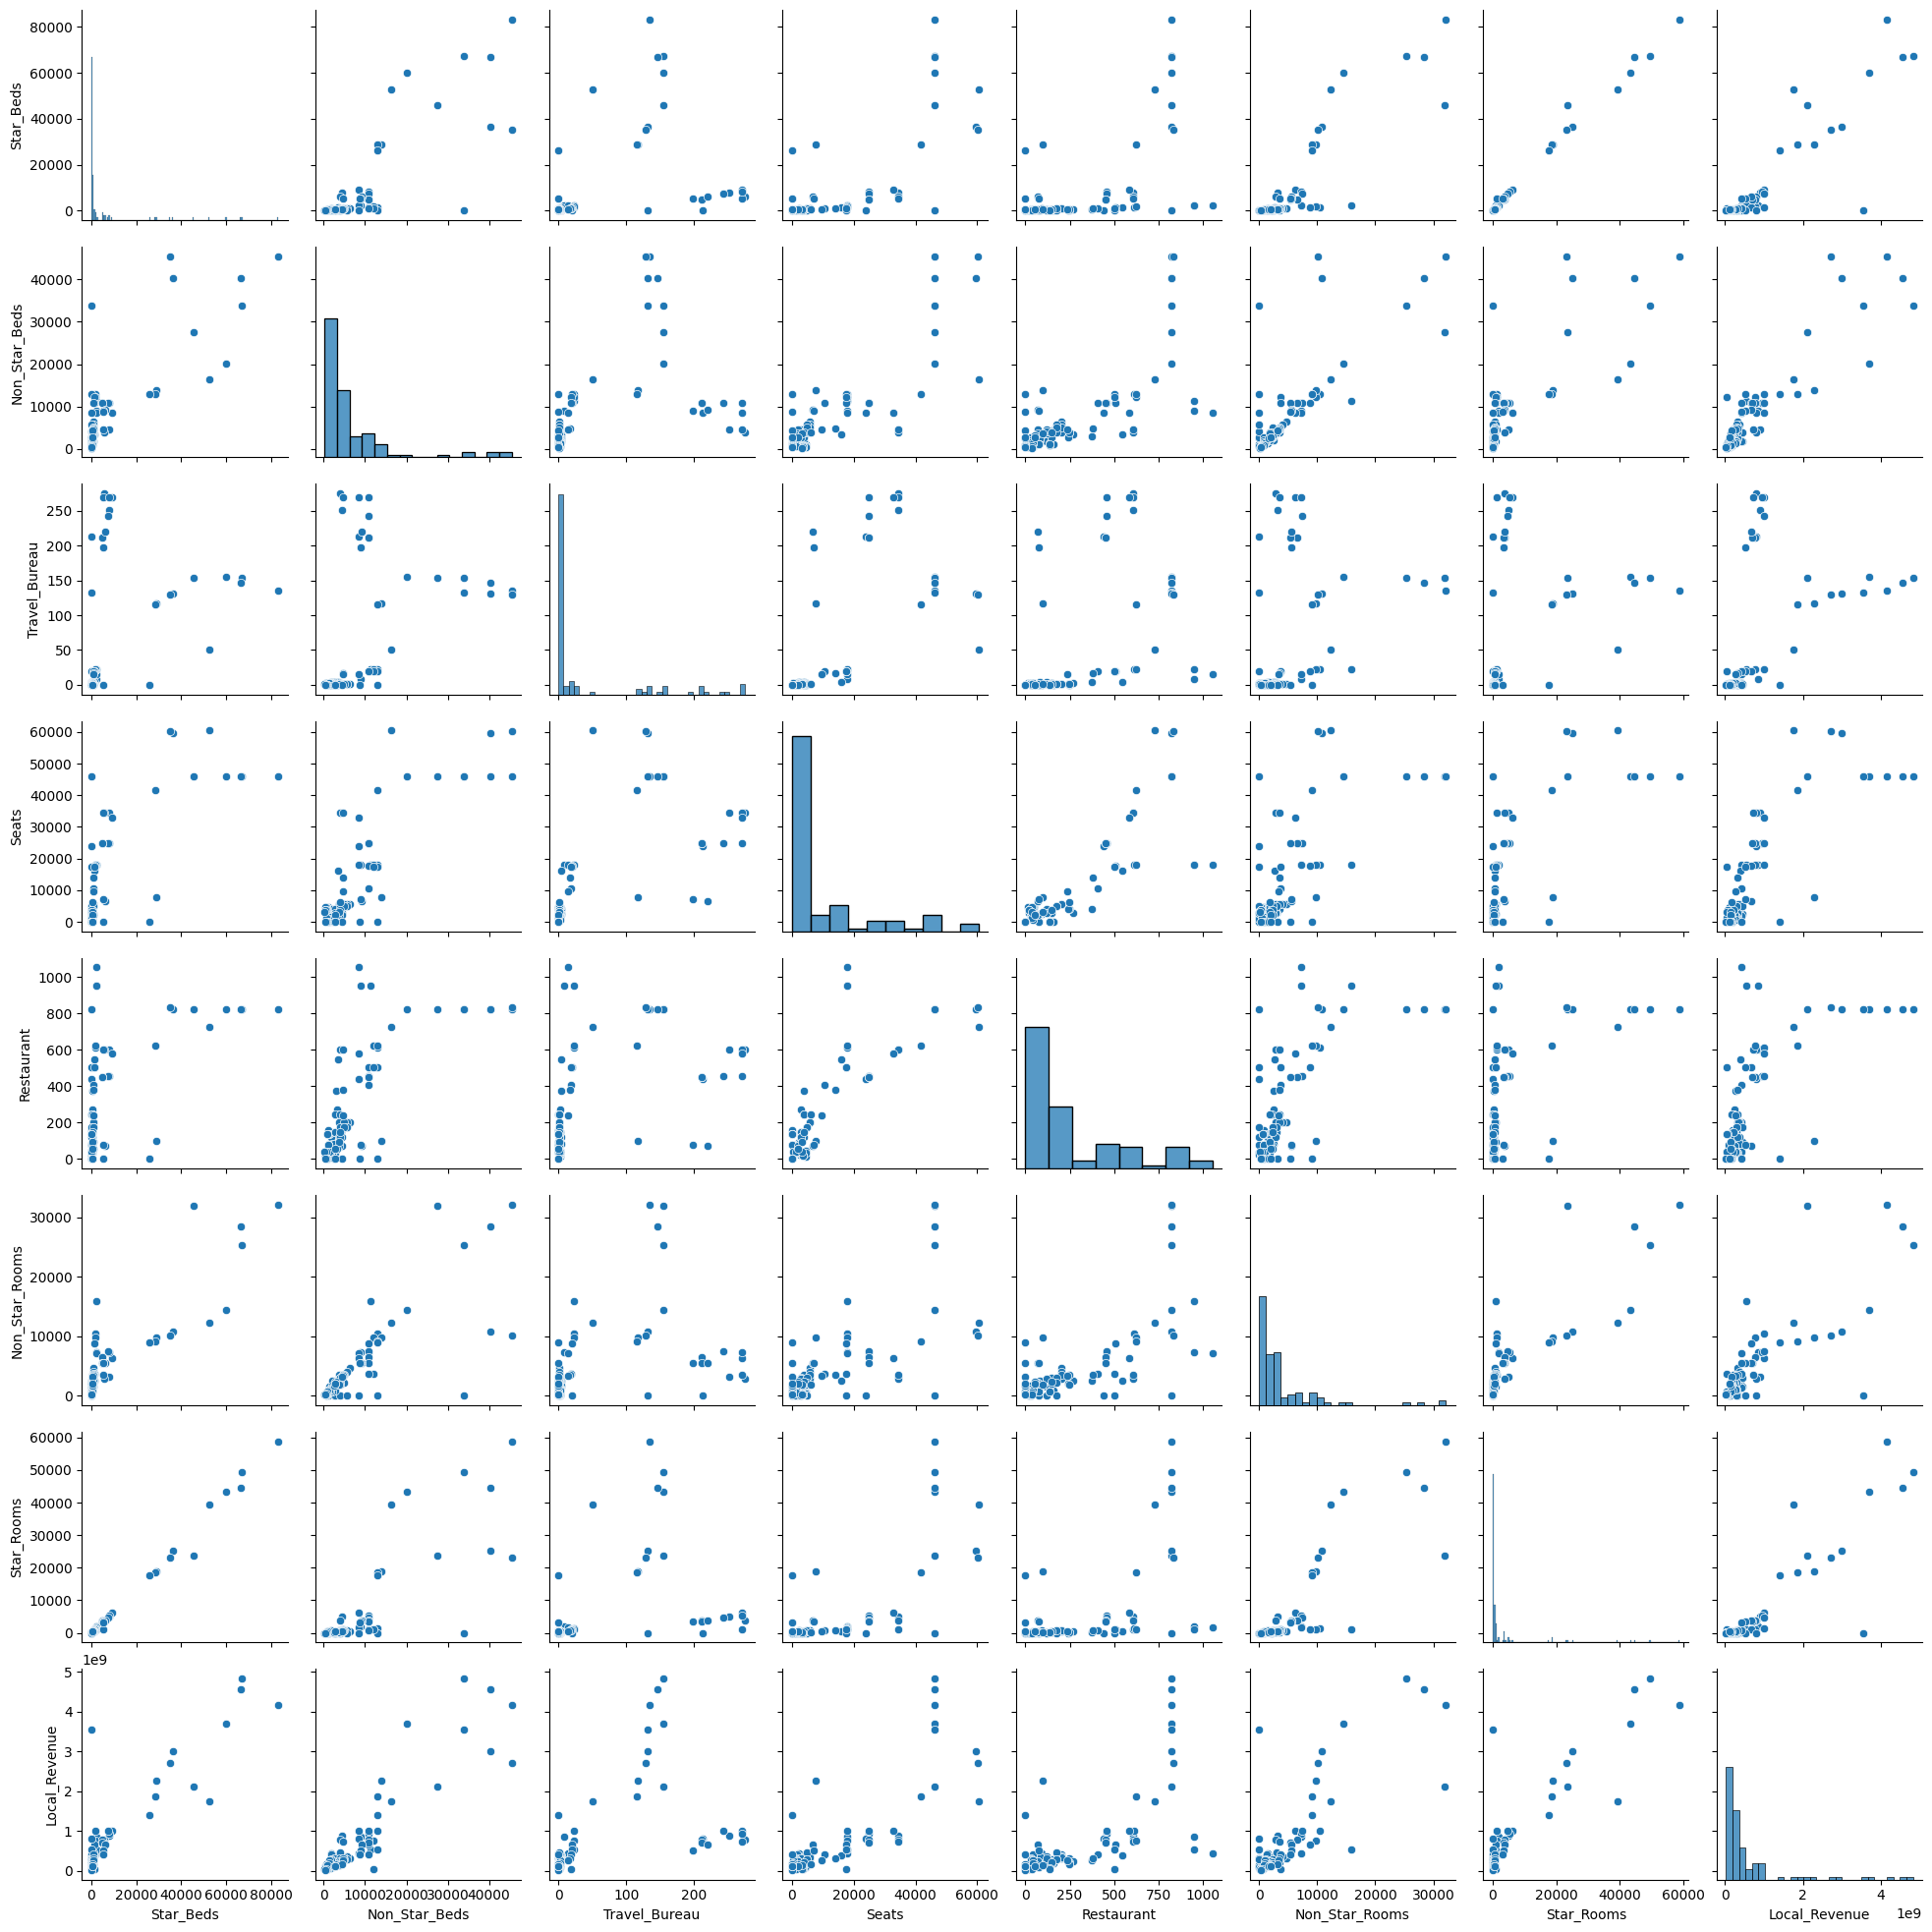

In [ ]:
sns.pairplot(bali_tourism)

# Create a linear model plot (using seaborn lmplot) Star_Beds vs Local_Revenue

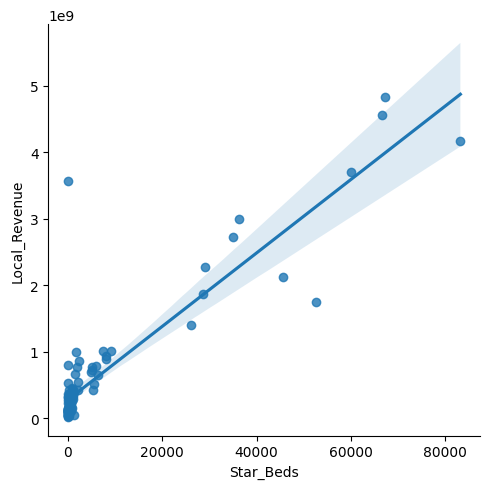

In [ ]:
sns.lmplot(x='Star_Beds', y="Local_Revenue", data=bali_tourism)

# 3. Training and Testing Data

# Set variable X equal to the numerical features of the bali _tourism and a variable y equal to the Local_Revenue column

In [ ]:
X=bali_tourism.drop(['Local_Revenue'],axis=1).values
X

In [ ]:
y=bali_tourism['Local_Revenue'].values
y

# Import cross validation train_test_split from sklearn

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets. Set test size=0.3 and random test=0

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 4. Training the Model

#Import linear regression from sklearn.linear_model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a instance of a LinearRegression model named lm

In [ ]:
lm = LinearRegression()

#Train/fit lm on the training data

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

# Print out the coefficients of the model

In [ ]:
lm.coef_

# 5. Predicting the Test Data

# Create a scatterplot of the real test values vs the predicted values

Text(0, 0.5, 'predicted values')

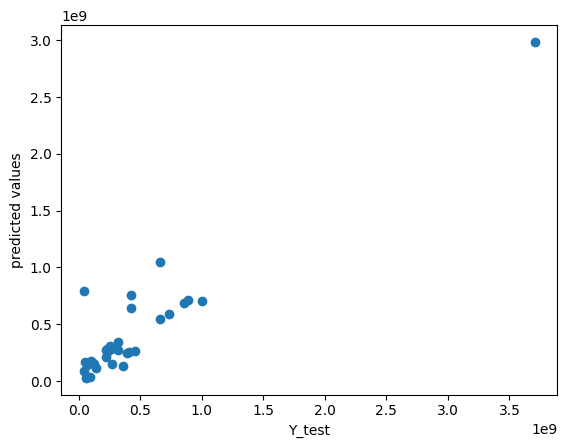

In [ ]:
plt.scatter(y_test, prediction)
plt.xlabel("Y_test")
plt.ylabel('predicted values')

In [ ]:
from sklearn import metrics

# 6. Evaluating the Model

# Calculate the mean_absolute_error, mean_squared_error and metrics.mean_squared_error for normalization of data

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test, prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 148897614.7597575
MSE 5.31886342619447e+16
RMSE 230626612.2153831


# Print out the R square value for deteminate how accurate the model in prediction

In [ ]:
metrics.explained_variance_score(y_test,prediction)

0.8668310781755959

# Testing of prediction instead testing data  that is prepared. Create a new variable DataFrame (df)

In [ ]:
new_df = pd.DataFrame({"Actual":y_test,"Predicted":prediction})
new_df

,Actual,Predicted
0,319612005,2.773931e+08
1,362314631,1.313361e+08
2,424472546,7.585625e+08
3,3705745447,2.985867e+09
4,219176733,2.075558e+08
5,141046017,1.157183e+08
6,424959413,6.472268e+08
7,410564892,2.599913e+08
8,391988445,2.484919e+08
9,55986570,2.773527e+07


# Print head of independent variable(X) from bali_tourism DataFrame

In [ ]:
X = bali_tourism.drop(["Local_Revenue"],axis=1)
X.head()

,Star_Beds,Non_Star_Beds,Travel_Bureau,Seats,Restaurant,Non_Star_Rooms,Star_Rooms
0,224,1172,0,88,136,919,158
1,941,1777,0,2435,92,1584,903
2,60006,20126,155,46103,823,14490,43163
3,2418,8973,8,17919,952,7282,1860
4,484,2834,0,4024,245,2477,333


# Print head of independent variable(y) from bali_tourism DataFrame

In [ ]:
y = bali_tourism['Local_Revenue']
y.head()

0     175992613
1     436408393
2    3705745447
3     857553633
4     309462458
Name: Local_Revenue, dtype: int64

# Add constant in X variable

In [ ]:
X = sm.add_constant(X)
X.head()

,const,Star_Beds,Non_Star_Beds,Travel_Bureau,Seats,Restaurant,Non_Star_Rooms,Star_Rooms
0,1.0,224,1172,0,88,136,919,158
1,1.0,941,1777,0,2435,92,1584,903
2,1.0,60006,20126,155,46103,823,14490,43163
3,1.0,2418,8973,8,17919,952,7282,1860
4,1.0,484,2834,0,4024,245,2477,333


# Print OLS Regression Result in watching performance of regression model

In [ ]:
OLS =  sm.OLS(endog = y, exog = X).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Local_Revenue   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     167.8
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           2.58e-52
Time:                        16:04:14   Log-Likelihood:                -2248.7
No. Observations:                 108   AIC:                             4513.
Df Residuals:                     100   BIC:                             4535.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.271e+07   3.86e+07      1.626      0.107   -1.38e+07    1.39e+08
Star_Beds       1.839e+04   2.77e+04      0.663      0.509   -3.66e+04    7.34e+04
Non_Star_Beds    5.76e+04   6624.264      8.695      0.000    4.45e+04    7.07e+04
Travel_Bureau   1.762e+06   5.25e+05      3.360      0.001    7.22e+05     2.8e+06
Seats          -1.495e+04   7033.231     -2.126      0.036   -2.89e+04    -997.781
Restaurant       6.47e+05    2.8e+05      2.315      0.023    9.24e+04     1.2e+06
Non_Star_Rooms -3.751e+04   1.49e+04     -2.517      0.013   -6.71e+04   -7948.505
Star_Rooms      3.105e+04    3.5e+04      0.887      0.377   -3.84e+04       1e+05
==============================================================================
Omnibus:                       51.487   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.604
Skew:                           1.254   Prob(JB):                     1.90e-94
Kurtosis:                      12.467   Cond. No.                     4.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#7. Conclusion

# Recreate the coefficient DataFrame below for determinate how many increase y_variable each X_variable

In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns = ["Coeff"])

ValueError: ignored